In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Dense,Conv2DTranspose,Input,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Activation,Reshape
import os
import matplotlib.pyplot as plt
print(os.listdir("../input"))
from keras.models import Model
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


In [2]:
(xtrain,ytrain),(xvalid,yvalid)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
xtrain1=xtrain.astype(np.float32)/255
xtrain1=xtrain1.reshape((-1,28,28,1))

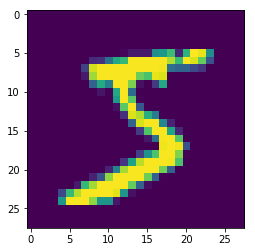

In [4]:
plt.imshow(xtrain1[0].reshape((28,28)))

In [5]:
noise=np.random.normal(loc=0.5,scale=0.5,size=xtrain1.shape)

In [6]:
xtrain_noise=xtrain1+noise  # Adding Noise to training data

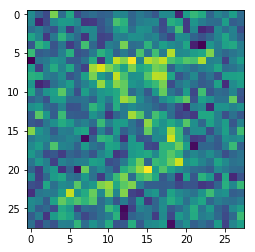

In [7]:
plt.imshow(xtrain_noise[0].reshape((28,28)))

In [8]:
xtrain_noise=np.clip(xtrain_noise,0.0,1.0)# very important function for clipping

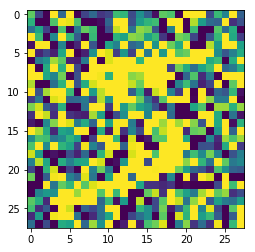

In [9]:
plt.imshow(xtrain_noise[0].reshape((28,28)))

In [10]:
inputshape=(28,28,1)
latentdim=16
batchsize=32
kernelsize=3


In [11]:
#Building Autoencoder model
inputs=Input(inputshape)
x=Conv2D(32,kernel_size=3,strides=2,activation='relu',padding='same')(inputs)
x=Conv2D(64,kernel_size=3,strides=2,activation='relu',padding='same')(x)
x=Flatten()(x)
latent=Dense(latentdim)(x)


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
encoder=Model(inputs,latent)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________


In [13]:
latentinput=Input((latentdim,))
x=Dense(7*7*64)(latentinput)
x=Reshape((7,7,64))(x)
x=Conv2DTranspose(64,kernel_size=3,strides=2,activation='relu',padding='same')(x)
x=Conv2DTranspose(32,kernel_size=3,strides=2,activation='relu',padding='same')(x)
outputs=Conv2DTranspose(1,kernel_size=3,padding='same',activation='sigmoid')(x)


In [14]:
decoder=Model(latentinput,outputs)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              53312     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 108,993
Trainable params: 108,993
Non-trainable params: 0
_________________________________________________________________


In [15]:
encoder(inputs).get_shape() # remember composite function sort of syntax can also work here

TensorShape([Dimension(None), Dimension(16)])

In [16]:
autoencoder=Model(inputs,decoder(encoder(inputs)))

In [17]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
model_1 (Model)              (None, 16)                69008     
_________________________________________________________________
model_2 (Model)              (None, 28, 28, 1)         108993    
Total params: 178,001
Trainable params: 178,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
autoencoder.compile(loss='mse',optimizer='adam')
history=autoencoder.fit(xtrain_noise,xtrain1,epochs=20,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0459
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0213
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0187
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0176
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0170
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0166
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0162
Epoch 8/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0160
Epoch 9/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0157
Epoch 10/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0155
Epoch 11/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0154
Epo

In [19]:
denoisedimgs=autoencoder.predict(xtrain1[0:10])

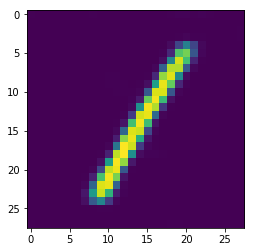

In [20]:
plt.imshow(denoisedimgs[3].reshape((28,28)))

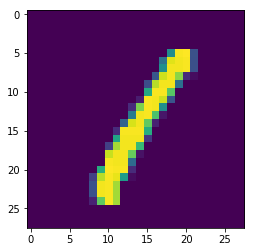

In [21]:
plt.imshow(xtrain1[3].reshape((28,28)))

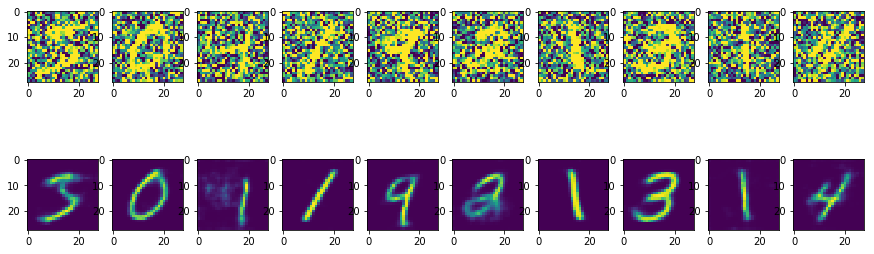

In [22]:
fig,axes=plt.subplots(2,10)
fig.set_figwidth(15)
fig.set_figheight(5)
for i in range(10):
    axes[0,i].imshow(xtrain_noise[i].reshape((28,28)))
    axes[1,i].imshow(denoisedimgs[i].reshape((28,28)))